In [23]:
from __future__ import print_function

import thinkstats2
from collections import Counter
import thinkplot
import nsfg
import math
import numpy as np
import first

In [19]:
##Setting Dataframes for prompt 1

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [20]:
def Summarize(live, firsts, others):
    """Print various summary statistics."""

    mean = live.totalwgt_lb.mean()
    var = live.totalwgt_lb.var()
    std = live.totalwgt_lb.std()

    print('Live mean', mean)
    print('Live variance', var)
    print('Live std', std)

    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()

    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

    print('Variance')
    print('First babies', var1)
    print('Others', var2)

    print('Difference in weeks', mean1 - mean2)
    print('Difference in hours', (mean1 - mean2) * 7 * 24)

    print('Difference relative to 39 weeks', (mean1 - mean2) / 39 * 100)

    d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print('Cohen d', d)





In [21]:
#Answering prompt 1
Summarize(live, firsts, others)

Live mean 7.265628457623368
Live variance 1.9832904288326532
Live std 1.4082934455690168
Mean
First babies 7.201094430437772
Others 7.325855614973262
Variance
First babies 2.0180273009157768
Others 1.9437810258964572
Difference in weeks -0.12476118453549034
Difference in hours -20.959879001962378
Difference relative to 39 weeks -0.3199004731679239
Cohen d -0.088672927072602


In [118]:
#Beginning Prompt 2

def MakeHists(live):
    """Plot Hists for number of children per household

    live: DataFrame
    others: DataFrame
    """
    hist = thinkstats2.Hist(np.floor(live.NUMKDHH), label='numkdhh')
    thinkplot.PrePlot(2, cols=2)

    thinkplot.SubPlot(1)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel='years',
                     ylabel='frequency',
                     axis=[0, 45, 0, 700])

    thinkplot.SubPlot(2)
    thinkplot.Pmf(hist)

    thinkplot.Save(root='probability_agepreg_hist', 
                   xlabel='years',
                   axis=[0, 45, 0, 700])

def MakeFigures(firsts, others):
    """Plot Pmfs of pregnancy length.

    firsts: DataFrame
    others: DataFrame
    """
    # plot the PMFs
    first_pmf = thinkstats2.Pmf(firsts.NUMKDHH, label='first')
    other_pmf = thinkstats2.Pmf(others.NUMKDHH, label='other')
    width = 0.45

    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(first_pmf, align='right', width=width)
    thinkplot.Hist(other_pmf, align='left', width=width)
    thinkplot.Config(xlabel='weeks',
                     ylabel='probability',
                     axis=[27, 46, 0, 0.6])

    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Pmfs([first_pmf, other_pmf])
    thinkplot.Save(root='probability_nsfg_pmf',
                   xlabel='weeks',
                   axis=[27, 46, 0, 0.6])

    # plot the differences in the PMFs
    weeks = range(35, 46)
    diffs = []
    for week in weeks:
        p1 = first_pmf.Prob(week)
        p2 = other_pmf.Prob(week)
        diff = 100 * (p1 - p2)
        diffs.append(diff)

    thinkplot.Bar(weeks, diffs)
    thinkplot.Save(root='probability_nsfg_diffs',
                   title='Difference in PMFs',
                   xlabel='weeks',
                   ylabel='percentage points',
                   legend=False)


def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf


def UnbiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to 1/value.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
        
    new_pmf.Normalize()
    return new_pmf


def ClassSizes():
    """Generate PMFs of observed and actual class size.
    """
    # start with the actual distribution of class sizes from the book
    d = { 7: 8, 12: 8, 17: 14, 22: 4, 
          27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

    # form the pmf
    pmf = thinkstats2.Pmf(d, label='actual')
    print('mean', pmf.Mean())
    print('var', pmf.Var())
    
    # compute the biased pmf
    biased_pmf = BiasPmf(pmf, label='observed')
    print('mean', biased_pmf.Mean())
    print('var', biased_pmf.Var())

    # unbias the biased pmf
    unbiased_pmf = UnbiasPmf(biased_pmf, label='unbiased')
    print('mean', unbiased_pmf.Mean())
    print('var', unbiased_pmf.Var())

    # plot the Pmfs
    thinkplot.PrePlot(2)
    thinkplot.Pmfs([pmf, biased_pmf])
    thinkplot.Save(root='class_size1',
                   xlabel='class size',
                   ylabel='PMF',
                   axis=[0, 52, 0, 0.27])


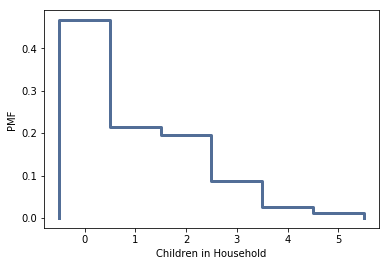

In [ ]:
response = nsfg.ReadFemResp()
pmf = thinkstats2.Pmf(response.numkdhh, label='numkdhh')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Children in Household', ylabel='PMF')

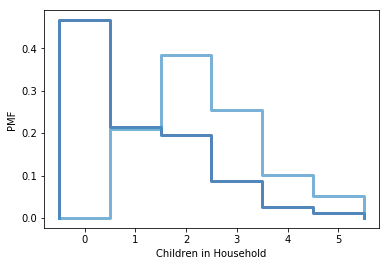

In [124]:
biased = BiasPmf(pmf, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Children in Household', ylabel='PMF')

In [122]:
print(pmf.Mean()) ##Dark Blue Above
print(biased.Mean()) ##Light Blue Above

1.024205155043831
2.403679100664282


In [106]:
###Beginning Prompt 3

import random
import matplotlib.pyplot as plt
import scipy
import statistics

In [40]:
nums = []
for i in range(1000):
    nums.append(random.random())
#print(nums)

Following is a cdf of random distribution:


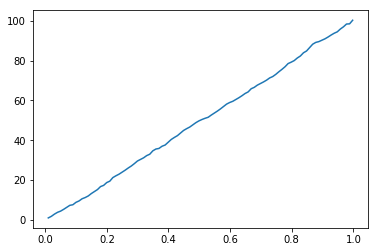

In [41]:
counts, bin_edges = np.histogram(nums, bins=100, normed=True)
cdf = np.cumsum(counts)
print("Following is a cdf of random distribution:")
plt.plot(bin_edges[1:], cdf)

(array([ 9.,  7., 12., 10.,  6.,  8., 11., 10.,  3., 12.,  6., 11.,  5.,
        10., 10., 12., 10., 15.,  6., 14.,  7., 18.,  9.,  8., 10., 10.,
        11., 10., 12., 13.,  8.,  8., 11.,  7., 17.,  9.,  3., 11.,  8.,
        14., 12., 10.,  9., 13., 13.,  9.,  9., 10., 12.,  8.,  6.,  7.,
         5., 11., 10., 10., 10., 13., 12.,  8.,  6.,  9.,  9., 10., 11.,
         9., 15.,  7., 11.,  8.,  8.,  9., 11.,  7., 11., 14., 12., 12.,
        16.,  7.,  9., 12., 11., 16., 10., 15., 18.,  8.,  4.,  7.,  8.,
         8., 10., 11.,  6., 13., 11., 14.,  1., 18.]),
 array([0.     , 0.00998, 0.01996, 0.02994, 0.03992, 0.0499 , 0.05988,
        0.06986, 0.07984, 0.08982, 0.0998 , 0.10978, 0.11976, 0.12974,
        0.13972, 0.1497 , 0.15968, 0.16966, 0.17964, 0.18962, 0.1996 ,
        0.20958, 0.21956, 0.22954, 0.23952, 0.2495 , 0.25948, 0.26946,
        0.27944, 0.28942, 0.2994 , 0.30938, 0.31936, 0.32934, 0.33932,
        0.3493 , 0.35928, 0.36926, 0.37924, 0.38922, 0.3992 , 0.40918,
        

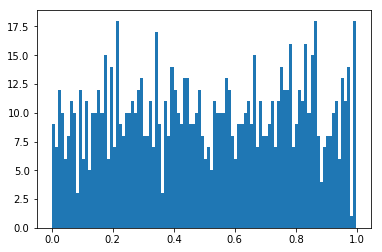

In [55]:
bins = 100
rounded = []
for item in nums:
    rounded.append(round(item,3))
plt.hist(rounded, bins=bins)

In [56]:
###Beginning Prompt 4

import brfss

In [71]:
df = brfss.ReadBrfss()

In [78]:
df

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
5,42.0,1,118.181818,415.161314,109.09,183.0
6,40.0,2,50.000000,422.810541,50.00,157.0
7,24.0,2,131.818182,1280.585980,122.73,178.0
8,37.0,1,87.727273,1245.060440,90.00,178.0
9,65.0,1,77.272727,382.738158,77.27,173.0


In [91]:
heights = []
for entry in df.values:
    if entry[1] == 1 and entry[5] + 5 > 6:
        heights.append(int(entry[5]))


Following is a cdf of random distribution:


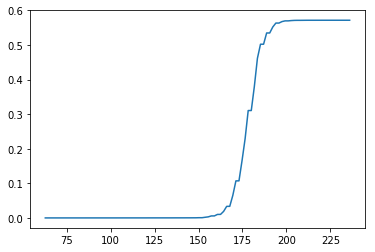

In [92]:
counts, bin_edges = np.histogram(heights, bins=100, normed=True)
cdf = np.cumsum(counts)
print("Following is a cdf of a normal distribution:")
plt.plot(bin_edges[1:], cdf)

In [104]:
#scipy.stats.norm.mean(heights)

sums = 0
for item in heights:
    sums = sums + item
avg = sums/len(heights)
avg*0.39

69.44582622549497

In [108]:
statistics.stdev(heights)*0.39

3.0121897473661168

In [109]:
## BMG only hires between 70 inches and 73 inches, which is average to 1 standard deviation- 34% of men

In [112]:
##Prompt 5
"""
probability of having a fraternal twin is 1/125
probability of having an identical twin is 1/300

the probability of not having a fraternal twin is 124/125 and
the probability of not having an identical twin is 299/300
"""

not_fraternal = 124/125
not_identical = 299/300

not_twin = not_fraternal*not_identical
prob_twin = 1-not_twin
prob_twin

0.011306666666666687